# Making initial imports

In [2]:
# !pip install langdetect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/elliot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/elliot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading data scrapped on TrustPilot

The dataframe is  composed with the comments scraped on Trustpolit at [this page](https://fr.trustpilot.com/review/www.centerparcs.fr/fr-fr).

In [4]:
df = pd.read_csv('clean_data_group_5.csv')
df.head()

,hotel_name,published_date,rating,review,language,title,trip_date,tokens,review_lemmatized,title_lemmatized
0,Center Parcs Le Lac d'Ailette,27 septembre 2018,4,"Après une désastreuse aventure au Bois franc, ...",fr,très bon week end,août 2018,"['apres', 'desastreuse', 'aventure', 'bois', '...","['apre', 'desastr', 'aventur', 'bois', 'franc'...","['tre', 'bon', 'week', 'end']"
1,Center Parcs Le Lac d'Ailette,18 janvier 2019,5,"Ambiance détendue , une vraie déconnexion. Le...",fr,"Séjour agréable comme toujours ,une vraie déco...",mars 2018,"['ambiance', 'detendue', 'vraie', 'deconnexion...","['ambianc', 'detendu', 'vrai', 'deconnexion', ...","['sejour', 'agreabl', 'comm', 'toujour', 'vrai..."
2,Center Parcs Le Lac d'Ailette,11 novembre 2018,3,Première fois que nous allions à center Parcs ...,fr,"3,5 serait plus juste",juillet 2018,"['premiere', 'fois', 'allions', 'center', 'par...","['premier', 'fois', 'allion', 'cent', 'parc', ...","['3 5', 'plus', 'just']"
3,Center Parcs Le Lac d'Ailette,3 octobre 2018,4,Génial pour les enfants petits et grands ! Ple...,fr,Endroit sympathique,avril 2018,"['genial', 'enfants', 'petits', 'grands', 'ple...","['genial', 'enfant', 'petit', 'grand', 'plein'...","['endroit', 'sympath']"
4,Center Parcs Le Lac d'Ailette,17 janvier 2019,2,Nous avons fait une réservation avec notre CE ...,fr,Réservation février 2019,janvier 2019,"['fait', 'reservation', 'novembre', '2018', 'c...","['fait', 'reserv', 'novembr', '2018', 'cottag'...","['reserv', 'fevri', '2019']"


In [7]:
df.review = df1.review.apply(lambda x:x.replace(r"\u00e8","è"))
df.review = df1.review.apply(lambda x:x.replace(r'\u00e9', 'é'))
df.review = df1.review.apply(lambda x:x.replace(r"\u00ea","ê"))
df.review = df1.review.apply(lambda x:x.replace(r"\u00eb","ë"))
df.review = df1.review.apply(lambda x:x.replace(r"\u00fb","û"))
df.review = df1.review.apply(lambda x:x.replace(r"\u00f9","ù"))
df.review = df1.review.apply(lambda x:x.replace(r'\u00e0', 'à'))
df.review = df1.review.apply(lambda x:x.replace(r'\u00e2', 'â'))
df.review = df1.review.apply(lambda x:x.replace(r'\u00f4', 'ô'))
df.review = df1.review.apply(lambda x:x.replace(r'\u00ee', 'î'))
df.review = df1.review.apply(lambda x:x.replace(r'\u00ef', 'ï'))
df.review = df1.review.apply(lambda x:x.replace(r'\u2019', "'"))
df.review = df1.review.apply(lambda x:x.replace(r'\'', "'"))

df.review

/home/elliot/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0      Après une désastreuse aventure au Bois franc, ...
1      Ambiance détendue , une vraie déconnexion.  Le...
2      Première fois que nous allions à center Parcs ...
3      Génial pour les enfants petits et grands ! Ple...
4      Nous avons fait une réservation avec notre CE ...
5      This was the third European CP we've visited, ...
6      I have to admit after reading so many negative...
7      they have good amenities but the cottages are ...
8      Pool was fun but there was overcrowding at tim...
9      Our third European Centre Parcs.  The location...
10     Hi- we are on our way home following a week at...
11     the place is nice, looks good.BUT we arrived t...
12     Journey from folkestone was easy it took appro...
13     Just had a fab family holiday plenty to do and...
14     This was our third stay in a Center Parcs' vil...
15     Stayed 24th Aug to 27th Aug. Very easy to get ...
16     So getting here was easy just 2.5 hours from C...
17     We had a nice family wee

In [8]:
df.title = df1.title.apply(lambda x:x.replace(r"\u00e8","è"))
df.title = df1.title.apply(lambda x:x.replace(r'\u00e9', 'é'))
df.title = df1.title.apply(lambda x:x.replace(r"\u00ea","ê"))
df.title = df1.title.apply(lambda x:x.replace(r"\u00eb","ë"))
df.title = df1.title.apply(lambda x:x.replace(r"\u00f9","ù"))
df.title = df1.title.apply(lambda x:x.replace(r'\u00ee', 'î'))
df.title = df1.title.apply(lambda x:x.replace(r'\u00ef', 'ï'))
df.title = df1.title.apply(lambda x:x.replace(r"\u00fb","û"))
df.title = df1.title.apply(lambda x:x.replace(r'\u00e0', 'à'))
df.title = df1.title.apply(lambda x:x.replace(r'\u00e2', 'â'))
df.title = df1.title.apply(lambda x:x.replace(r'\u00f4', 'ô'))
df.title = df1.title.apply(lambda x:x.replace(r'\u2019', "'"))
df.title = df1.title.apply(lambda x:x.replace(r'\'', "'"))

df.title

0                                      très bon week end
1      Séjour agréable comme toujours ,une vraie déco...
2                                 3,5 serait plus juste 
3                                    Endroit sympathique
4                               Réservation février 2019
5               Great holiday, but too many cars on site
6                                  Supassed expectations
7          good amenities but the cottages are not clean
8                    Not enamoured with Le Lac D'Ailette
9                     Family holiday - children 10 and 7
10                           Very tired and dirty resort
11               Nice place, super disappointing service
12                                       Annual holiday 
13                                             Fantastic
14                                              Not good
15                                          'A surprise'
16                  Brilliant Holiday - Here's some tips
17             Fun weekend but 

In [9]:
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r"\u00e8","è"))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u00e9', 'é'))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r"\u00ea","ê"))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r"\u00eb","ë"))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r"\u00f9","ù"))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u00ee', 'î'))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u00ef', 'ï'))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r"\u00fb","û"))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u00e0', 'à'))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u00e2', 'â'))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u00f4', 'ô'))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\u2019', "'"))
df.trip_date = df1.trip_date.apply(lambda x:x.replace(r'\'', "'"))

In [10]:
df['review']

0      Après une désastreuse aventure au Bois franc, ...
1      Ambiance détendue , une vraie déconnexion.  Le...
2      Première fois que nous allions à center Parcs ...
3      Génial pour les enfants petits et grands ! Ple...
4      Nous avons fait une réservation avec notre CE ...
5      This was the third European CP we've visited, ...
6      I have to admit after reading so many negative...
7      they have good amenities but the cottages are ...
8      Pool was fun but there was overcrowding at tim...
9      Our third European Centre Parcs.  The location...
10     Hi- we are on our way home following a week at...
11     the place is nice, looks good.BUT we arrived t...
12     Journey from folkestone was easy it took appro...
13     Just had a fab family holiday plenty to do and...
14     This was our third stay in a Center Parcs' vil...
15     Stayed 24th Aug to 27th Aug. Very easy to get ...
16     So getting here was easy just 2.5 hours from C...
17     We had a nice family wee

# Shapping dataFrame

**Making some modifications from raw data**

In [81]:
# Deleting '\n' from content and name columns
#clean_n = lambda x: ' '.join(x.split()).lower()

#for col in ['name', 'content']:
#    df[col] = df[col].apply(clean_n)

# Setting date as index
df1.set_index('published_date', inplace = True)

#  Displaying result
df1.head()

KeyError: 'published_date'

# Exploratory Data Analysis

In [5]:
# Even if not really useful for this case, a good habit is to start with df.describe() and df.info() when you start working on a dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 10 columns):
hotel_name           663 non-null object
published_date       663 non-null object
rating               663 non-null int64
review               663 non-null object
language             663 non-null object
title                663 non-null object
trip_date            663 non-null object
tokens               663 non-null object
review_lemmatized    663 non-null object
title_lemmatized     663 non-null object
dtypes: int64(1), object(9)
memory usage: 51.9+ KB


**Studying eventual doubles**

- We're here looking at names which are pseudos. Be careful, differents people could use the same ones. The date is a good indicator to know if the same person let 2 comments.

In [67]:
#print('Number of comments', df.reviewer_id.count())
#print('Number of unique names: ', df.reviewer_id.nunique())

#double = df.reviewer_id.value_counts().index.tolist()[:sum(df.reviewer_id.value_counts()>=2)]
#for name in double:
#    print('\n',name)
#    date_double = df[df.reviewer_id==name].index.tolist()
#    content_double = df[df.reviewer_id==name].review.tolist()
#    [print(date,content) for date,content in zip(date_double,content_double)]

AttributeError: 'DataFrame' object has no attribute 'reviewer_id'

You might find interesting things in your dataset. 

For example it is fun here to see **Peltier**'s comments and how he changed is mind:

- April 14th 13:41 : "formule intéressante pour de courtes vacances"
- April 14th 20:33 : "pas de réseau et deux chaines tv manquantes" 



**Rapid overview of global rating**


Average rating is : 3.45


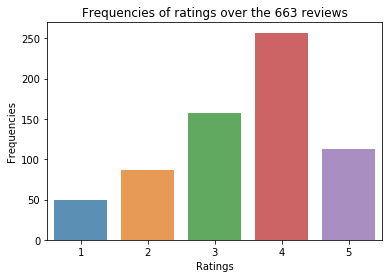

In [68]:
# Average rating value
print('Average rating is : {}'.format(round(df.rating.mean(),2)))

# Plotting rating distribution
X_ratings = df.rating.value_counts()
ax = sns.barplot(X_ratings.index,X_ratings,alpha=0.8)
ax.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(df.shape[0]))
plt.show()

**Distribution of comments length**

C:\Users\Ellio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


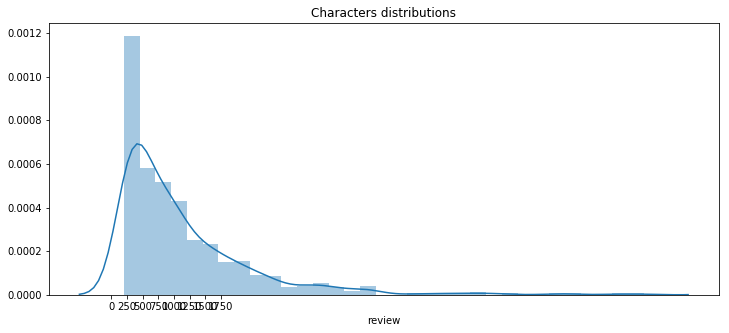

In [69]:
# Making the plot
x = plt.figure(figsize=(12,5))
sns.distplot(df1['review'].apply(len))
plt.title('Characters distributions')
plt.xticks(range(0,2000,250))
plt.show()

In [71]:
# Repartition of reviews dates
# df1['review'].resample('M').count().plot()

KeyError: 'published_date'

# Pre-Processing 1 : Filters for punctuation and specific characters

In [11]:
# creating a list with all reviews
all_reviews = df.review.tolist()

In [12]:
# transformating comments into lower-case text 
lower_reviews = [review.lower() for review in all_reviews]

In [13]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [review.translate(str.maketrans(transformation_dict)) for review in lower_reviews]

In [14]:
# removing accent
with_accent = ['é', 'è','ê','ë', 'à','â','ô','û','ù','î','ï']
without_accent = ['e', 'e','e','e', 'a','a','o','u','u','i','i']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]

In [15]:
# Displaying some results 
for i in range(5):
    print(all_reviews[i])
    print(no_accent_reviews[i])
    print('\n')

Après une désastreuse aventure au Bois franc, quel plaisir de retourner au lac d'Ailette..en plus les cottages ont été rénovés avec goût, Partis début août sous la canicule, nous avons apprécié les plaisirs de l'aquamondo malgré l'affluence,(peut être faudrait-il que les personnes ne séjournant pas dans le parc n'aient plus accès aux installations quand celui-ci est déjà complet - 1700 personnes dans la piscine c'est vraiment beaucoup trop)Nous avons loué un cottage premium bord de lac . Nous avons aimés nos soirées tranquilles sur la terrasse; beaucoup moins la chaleur dans le cottage (ventilation à prévoir)  celui-ci était très propre à notre arrivée et les quelques soucis rencontrés (pas de pile dans la télécommande, sèche-linge cassé) ont été très vite réglés par un personnel compétant  De quoi bien commencer notre séjour. Un bel endroit où nous reviendrons certainement l'été prochain
apres une desastreuse aventure au bois franc  quel plaisir de retourner au lac d ailette  en plus 

In [16]:
def number_of_unique_words(list_of_reviews):
  
    # Concatenating all reviews from the list
    all_words = ''.join(list_of_reviews)

    # Tokenizing
    unique_tokens = set(word_tokenize(all_words))
  
    # Returning length of list
    return len(unique_tokens)

In [17]:
print(number_of_unique_words(all_reviews))

10570


In [18]:
print(number_of_unique_words(lower_reviews))

9556


In [19]:
print(number_of_unique_words(no_punctuation_reviews))

7747


In [20]:
print(number_of_unique_words(no_accent_reviews))

7732


# Pre-processing 2 : Tokenization

**Doing it in two different ways**

In [21]:
# Using regular expression
tokenized_reviews_re = [re.split('\s+', review) for review in no_accent_reviews]

In [22]:
# using NLP libraries
tokenized_reviews_nltk = [word_tokenize(review) for review in no_accent_reviews]

**And making a comparison of results**

In [23]:
# Making a comparison between both of them
print("With NLTK  library : {}".format(len(tokenized_reviews_nltk)))
print("With RegEx library : {}".format(len(tokenized_reviews_re)))

With NLTK  library : 663
With RegEx library : 663


**Try to analyze the next lines of code and to understand the difference between both of them**

Here is an original review

In [24]:
# Choosing a review to inspect
n_review = 10
print(all_reviews[n_review])

Hi- we are on our way home following a week at Centre Parcs. Whilst we had a good family holiday, we were very disappointed with the resort. First issue is the cleanliness- it's really dirty. We booked two cottages with one a premium lakeside house. Whilst some of the furnishings were new, the kitchen was filthy with ingrained dirt. The house looked like it hadn't been properly cleaned in years. All cooking equipment was also very old and crappy- It put us off cooking inside. Outside we had a great view but it was also filthy. Thick cobwebs and dirt all over the verander and decking. Decking was also very dangerous as it was obviously not maintained and there were huge gaps where the chairs fell down resulting in numerous injuries over the week. Our children had a great time in he pool but it was so old and In terrible condition. Nothing like the parcs at Woburn and Elvden.The maintaince, health and safety and cleanliness were really poor at the resort. However the location was beautif

And here are the tokenized ones

In [25]:
print(tokenized_reviews_nltk[n_review])

['hi', 'we', 'are', 'on', 'our', 'way', 'home', 'following', 'a', 'week', 'at', 'centre', 'parcs', 'whilst', 'we', 'had', 'a', 'good', 'family', 'holiday', 'we', 'were', 'very', 'disappointed', 'with', 'the', 'resort', 'first', 'issue', 'is', 'the', 'cleanliness', 'it', 's', 'really', 'dirty', 'we', 'booked', 'two', 'cottages', 'with', 'one', 'a', 'premium', 'lakeside', 'house', 'whilst', 'some', 'of', 'the', 'furnishings', 'were', 'new', 'the', 'kitchen', 'was', 'filthy', 'with', 'ingrained', 'dirt', 'the', 'house', 'looked', 'like', 'it', 'hadn', 't', 'been', 'properly', 'cleaned', 'in', 'years', 'all', 'cooking', 'equipment', 'was', 'also', 'very', 'old', 'and', 'crappy', 'it', 'put', 'us', 'off', 'cooking', 'inside', 'outside', 'we', 'had', 'a', 'great', 'view', 'but', 'it', 'was', 'also', 'filthy', 'thick', 'cobwebs', 'and', 'dirt', 'all', 'over', 'the', 'verander', 'and', 'decking', 'decking', 'was', 'also', 'very', 'dangerous', 'as', 'it', 'was', 'obviously', 'not', 'maintained'

In [26]:
print(tokenized_reviews_re[n_review])

['hi', 'we', 'are', 'on', 'our', 'way', 'home', 'following', 'a', 'week', 'at', 'centre', 'parcs', 'whilst', 'we', 'had', 'a', 'good', 'family', 'holiday', 'we', 'were', 'very', 'disappointed', 'with', 'the', 'resort', 'first', 'issue', 'is', 'the', 'cleanliness', 'it', 's', 'really', 'dirty', 'we', 'booked', 'two', 'cottages', 'with', 'one', 'a', 'premium', 'lakeside', 'house', 'whilst', 'some', 'of', 'the', 'furnishings', 'were', 'new', 'the', 'kitchen', 'was', 'filthy', 'with', 'ingrained', 'dirt', 'the', 'house', 'looked', 'like', 'it', 'hadn', 't', 'been', 'properly', 'cleaned', 'in', 'years', 'all', 'cooking', 'equipment', 'was', 'also', 'very', 'old', 'and', 'crappy', 'it', 'put', 'us', 'off', 'cooking', 'inside', 'outside', 'we', 'had', 'a', 'great', 'view', 'but', 'it', 'was', 'also', 'filthy', 'thick', 'cobwebs', 'and', 'dirt', 'all', 'over', 'the', 'verander', 'and', 'decking', 'decking', 'was', 'also', 'very', 'dangerous', 'as', 'it', 'was', 'obviously', 'not', 'maintained'

In [27]:
# We select the secon one which seems more accurate
tokenized_reviews = tokenized_reviews_nltk

# Pre-processing 3 : Stopword removing

In [28]:
# Using a list with words to delete
stopW = stopwords.words('english')

In [29]:
# Customizing it with our needs
stopW += ['les', 'a', 'tout',"i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"]

In [45]:
# Stopword_list
df['stopword_reviews'] = [[token for token in review if token not in stopW] for review in tokenized_reviews]
              

In [46]:
df

,hotel_name,published_date,rating,review,language,title,trip_date,tokens,review_lemmatized,title_lemmatized,stopword_reviews
0,Center Parcs Le Lac d'Ailette,27 septembre 2018,4,"Après une désastreuse aventure au Bois franc, ...",fr,très bon week end,août 2018,"['apres', 'desastreuse', 'aventure', 'bois', '...","['apre', 'desastr', 'aventur', 'bois', 'franc'...","['tre', 'bon', 'week', 'end']","[apres, une, desastreuse, aventure, au, bois, ..."
1,Center Parcs Le Lac d'Ailette,18 janvier 2019,5,"Ambiance détendue , une vraie déconnexion. Le...",fr,"Séjour agréable comme toujours ,une vraie déco...",mars 2018,"['ambiance', 'detendue', 'vraie', 'deconnexion...","['ambianc', 'detendu', 'vrai', 'deconnexion', ...","['sejour', 'agreabl', 'comm', 'toujour', 'vrai...","[ambiance, detendue, une, vraie, deconnexion, ..."
2,Center Parcs Le Lac d'Ailette,11 novembre 2018,3,Première fois que nous allions à center Parcs ...,fr,"3,5 serait plus juste",juillet 2018,"['premiere', 'fois', 'allions', 'center', 'par...","['premier', 'fois', 'allion', 'cent', 'parc', ...","['3 5', 'plus', 'just']","[premiere, fois, que, nous, allions, center, p..."
3,Center Parcs Le Lac d'Ailette,3 octobre 2018,4,Génial pour les enfants petits et grands ! Ple...,fr,Endroit sympathique,avril 2018,"['genial', 'enfants', 'petits', 'grands', 'ple...","['genial', 'enfant', 'petit', 'grand', 'plein'...","['endroit', 'sympath']","[genial, pour, enfants, petits, et, grands, pl..."
4,Center Parcs Le Lac d'Ailette,17 janvier 2019,2,Nous avons fait une réservation avec notre CE ...,fr,Réservation février 2019,janvier 2019,"['fait', 'reservation', 'novembre', '2018', 'c...","['fait', 'reserv', 'novembr', '2018', 'cottag'...","['reserv', 'fevri', '2019']","[nous, avons, fait, une, reservation, avec, no..."
5,Center Parcs Le Lac d'Ailette,"August 31, 2018",4,"This was the third European CP we've visited, ...",en,"Great holiday, but too many cars on site",August 2018,"['this', 'was', 'the', 'third', 'european', ' ...","['this', 'was', 'the', 'third', 'european', ' ...","['great', 'holiday', 'but', 'too', 'many', 'ca...","[third, european, cp, visited, met, expectatio..."
6,Center Parcs Le Lac d'Ailette,"September 1, 2018",5,I have to admit after reading so many negative...,en,Supassed expectations,August 2018,"['have', 'admit', 'after', 'reading', 'many', ...","['hav', 'admit', 'after', 'reading', 'many', '...","['supassed', 'expect']","[admit, reading, many, negative, reviews, rese..."
7,Center Parcs Le Lac d'Ailette,"August 31, 2018",3,they have good amenities but the cottages are ...,en,good amenities but the cottages are not clean,August 2018,"['they', 'have', 'good', 'amenities', 'but', '...","['they', 'hav', 'good', 'amenit', 'but', 'the'...","['good', 'amenit', 'but', 'the', 'cottag', 'ar...","[good, amenities, cottages, clean, bring, towe..."
8,Center Parcs Le Lac d'Ailette,"September 1, 2018",3,Pool was fun but there was overcrowding at tim...,en,Not enamoured with Le Lac D'Ailette,August 2018,"['pool', 'was', 'fun', 'but', 'there', 'was', ...","['pool', 'was', 'fun', 'but', 'ther', 'was', '...","['not', 'enamoured', 'with', 'lac', 'd ailet']","[pool, fun, overcrowding, times, little, uncle..."
9,Center Parcs Le Lac d'Ailette,"September 1, 2018",2,Our third European Centre Parcs. The location...,en,Family holiday - children 10 and 7,August 2018,"['our', 'third', 'european', 'centre', 'parcs'...","['our', 'third', 'european', 'centr', 'parc', ...","['family', 'holiday', 'children', 'and']","[third, european, centre, parcs, location, rur..."


# Some visualization about what we've done - To check if stopword deletion worked

In [36]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

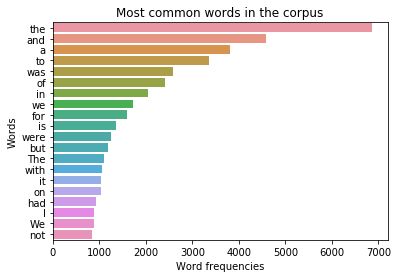

136297


In [37]:
# Making a first plot with original data
all_words = []
for review in all_reviews:
    for word in review.split():
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

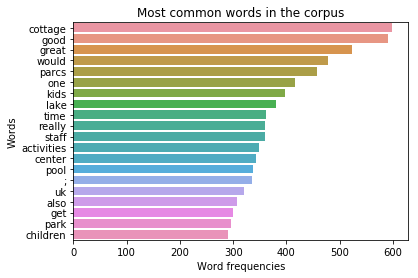

71575


In [38]:
# And making it with our current data
all_words = []
for review in stopword_reviews:
    for word in review:
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))



### We will decide later if we remove words like cottage, good, great, parcs etc

...Much better ! Isn't it ?

### writing a new file with the cleaned data

In [48]:
df.to_csv (r'test.csv', index=False)

## LDA

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 40)
import numpy as np
import re
import spacy
import nltk
from nltk import FreqDist
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [ ]:
data = pd.read_csv("test.csv", sep=",", index_col=0)

In [ ]:
data['stopword_reviews'] = data['stopword_reviews'].str.replace(r"[\[\]\']", "").str.split(", ")
data.dropna(subset=['stopword_reviews'], inplace=True)

## This is where we add our tailored stopwords

In [ ]:
list_stop_words = ["&", ";", "2", "get", "got", "went","one","center","really","would","4","great","good","cottage"]

In [ ]:
def remove_stop_word(x, list_stop_words=list_stop_words):
    clean_x = [l for l in x if l not in list_stop_words]
    return clean_x

In [ ]:
data['stopword_reviews'] = data['stopword_reviews'].apply(remove_stop_word)

## Building the LDA Model

In [ ]:
dictionary = corpora.Dictionary(data['stopword_reviews'])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data['stopword_reviews']]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
num_topics = 3
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, 
                num_topics=num_topics, 
                alpha=[0.0001] * num_topics, 
                eta=[0.0001] * len(dictionary),
                chunksize=2000,
                passes=4,
                random_state=100,
               )

In [ ]:
lda_model.print_topics(num_words=8)

In [ ]:
# Visualize the topics
pd.options.display.max_colwidth = 2000
viz = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary, mds='tsne')

In [ ]:
pyLDAvis.enable_notebook()
viz

## Wordcloud and TFIDF